# Кластеризация и уменьшение размерности

Подготовлено на основе [материалов с сайта Коротеева М.В.](https://koroteev.site/ml/)

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

## Кластеризация

1.1 Загрузите [датасет](https://github.com/koroteevmv/ML_course/blob/main/ML6.1_clustering/data/Mall_Customers.csv). Приведите описательную статистику. Преобразуйте все нечисловые характеристики в числовые. Постройте графическую интерпретацию значений датасета. В качестве x-координаты используйте Annual Income, в качестве y-координаты Spending Score. 

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.nunique()

CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [7]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
df['Genre'] = df['Genre'].astype('category')
df['Genre'] = df['Genre'].cat.codes

In [9]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Genre                   200 non-null    int8 
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4), int8(1)
memory usage: 6.6 KB


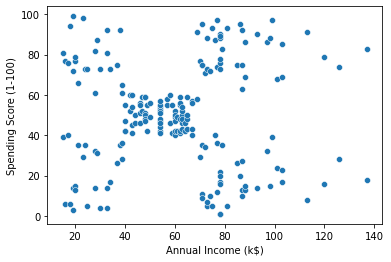

In [11]:
f, ax = plt.subplots()
sns.scatterplot(y="Spending Score (1-100)", x="Annual Income (k$)", data=df, ax=ax)
plt.show()

1.2 Определите наилучшее число кластеров на основе созданной визуализации. Обучите модель К-средних и предскажите кластер для каждого объекта из датасета.

In [12]:
# визуально очевидно выделяются 5 кластеров

In [13]:
df_sa = df.iloc[:,[3,4]]

In [14]:
kmeans = KMeans(n_clusters = 5, init ='k-means++',random_state = 0)
predicted = kmeans.fit_predict(df_sa)
predicted

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [15]:
df['pred_sa_5'] = predicted

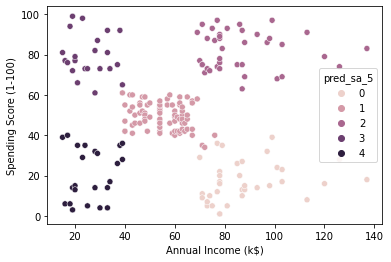

In [16]:
f, ax = plt.subplots()
sns.scatterplot(y="Spending Score (1-100)", x="Annual Income (k$)", hue="pred_sa_5", data=df, ax=ax)
plt.show()

1.3 Постройте графическую интерпретацию с центрами кластеров, в качестве x-координаты используйте Возраст, в качестве y-координаты Spending Score. Раскрасьте точки в соответствии с номером из кластера.

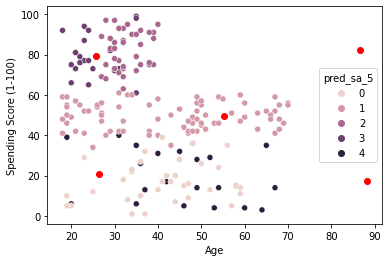

In [17]:
f, ax = plt.subplots()
sns.scatterplot(y="Spending Score (1-100)", x="Age", hue="pred_sa_5", data=df, ax=ax)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red')
plt.show()

1.4 Определите наилучшее число кластеров с помощью графической зависимости числа кластеров от суммы квадратов расстояний значений датасета до центра кластера

([<matplotlib.axis.XTick at 0x7f89386481f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

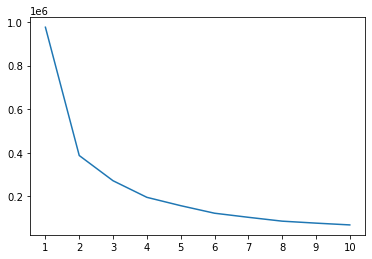

In [18]:
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i,random_state=42)
    k_means.fit(df)
    wcss.append(k_means.inertia_)

plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))

In [19]:
# оптимальное число кластеров = 4

In [20]:
df_sage = df.iloc[:,[2,4]]

In [21]:
kmeans = KMeans(n_clusters = 4, init ='k-means++',random_state = 0)
predicted = kmeans.fit_predict(df_sage)
predicted

array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1,
       0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 3, 2,
       0, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 2, 1, 3, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [22]:
df['pred_sage_4'] = predicted

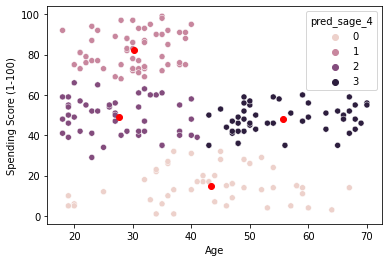

In [23]:
f, ax = plt.subplots()
sns.scatterplot(y="Spending Score (1-100)", x="Age", hue="pred_sage_4", data=df, ax=ax)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red')
plt.show()

1.5 Используйте другие алгоритмы кластеризации, реализованные в `sklearn`. Визуализируйте результат.

### Spectral Clustering

In [24]:
from sklearn.cluster import SpectralClustering

spect = SpectralClustering(n_clusters=4, affinity= 'nearest_neighbors').fit(df_sage)
df['spect_cl_sage_4'] = spect.labels_

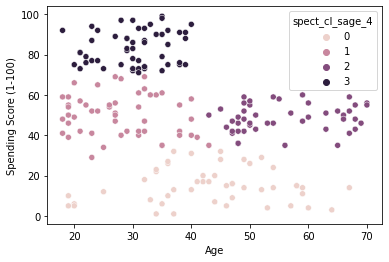

In [25]:
f, ax = plt.subplots()
sns.scatterplot(y="Spending Score (1-100)", x="Age", hue="spect_cl_sage_4", data=df, ax=ax)
plt.show()

### Agglomerative Clustering

In [26]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=4).fit(df_sage)
df['agg_cl_sage_4'] = clustering.labels_

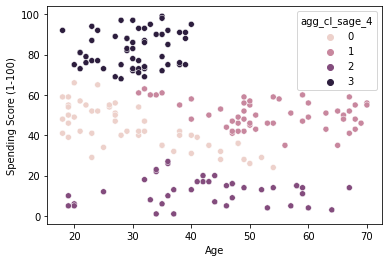

In [27]:
f, ax = plt.subplots()
sns.scatterplot(y="Spending Score (1-100)", x="Age", hue="agg_cl_sage_4", data=df, ax=ax)
plt.show()

## Уменьшение размерности

2.1 Загрузите [датасет](https://raw.githubusercontent.com/k8xu/credit-risk-classification/master/credit_data.csv). Приведите описательную статистику. Преобразуйте все нечисловые характеристики в числовые. Заполните пропуски. Разделите данные на тестовую и обучающую выборки.

In [28]:
df = pd.read_csv(r'https://raw.githubusercontent.com/k8xu/credit-risk-classification/master/credit_data.csv', index_col = 0)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [30]:
nans = df.isna().sum()
nans[nans > 0]

Saving accounts     183
Checking account    394
dtype: int64

In [31]:
for i in ['Saving accounts', 'Checking account']:
    df[i] = df[i].fillna(df[i].mode()[0])

In [32]:
nans = df.isna().sum()
nans[nans > 0]

Series([], dtype: int64)

In [33]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [34]:
df.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

In [35]:
df.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [36]:
for i in ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']:
    df[i] = df[i].astype('category')
    df[i] = df[i].cat.codes

In [37]:
df.corr()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
Age,1.000000,0.161694,0.015673,-0.301419,0.015772,-0.027176,0.032716,-0.036136,-0.074084,0.091127
Sex,0.161694,1.000000,0.070298,-0.219844,-0.014425,-0.012705,0.093482,0.081432,-0.063231,0.075493
Job,0.015673,0.070298,1.000000,-0.107191,-0.034596,-0.043277,0.285385,0.210910,-0.025326,-0.032735
Housing,-0.301419,-0.219844,-0.107191,1.000000,0.043324,-0.028196,-0.135632,-0.157049,0.020633,-0.019315
Saving accounts,0.015772,-0.014425,-0.034596,0.043324,1.000000,0.015763,-0.077929,-0.043274,-0.024817,0.102751
Checking account,-0.027176,-0.012705,-0.043277,-0.028196,0.015763,1.000000,0.006953,0.004163,0.018577,-0.052375
Credit amount,0.032716,0.093482,0.285385,-0.135632,-0.077929,0.006953,1.000000,0.624984,-0.151720,-0.154739
Duration,-0.036136,0.081432,0.210910,-0.157049,-0.043274,0.004163,0.624984,1.000000,-0.083459,-0.214927
Purpose,-0.074084,-0.063231,-0.025326,0.020633,-0.024817,0.018577,-0.151720,-0.083459,1.000000,0.061145
Risk,0.091127,0.075493,-0.032735,-0.019315,0.102751,-0.052375,-0.154739,-0.214927,0.061145,1.000000


In [38]:
X = df.drop(columns=['Risk'])
y = df.Risk
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

2.2 Обучите модель Random Forest для предсказания переменной `Risk`. Оцените полученную модель с помощью метрик.

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.decomposition import PCA

In [40]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('Accuracy score:', round(accuracy_score(y_test, y_pred), 3))
print('Precision score:', round(precision_score(y_test, y_pred), 3))
print('Recall score:', round(recall_score(y_test, y_pred), 3))

Accuracy score: 0.725
Precision score: 0.75
Recall score: 0.923


2.3 Понизьте размерность данных до 2 с помощью метода главных компонент. Обучите модель Random Forest, используя данные после уменьшения размерности, и оцените ее эффективность с помощью метрик.

In [41]:
pca = PCA(n_components=2)
X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.transform(X_test)
print("original shape:        ", X.shape)
print("transformed train shape:", X_train_PCA.shape)
print("transformed test shape: ", X_test_PCA.shape)

original shape:         (1000, 9)
transformed train shape: (800, 2)
transformed test shape:  (200, 2)


In [42]:
rfc_PCA = RandomForestClassifier()
rfc_PCA.fit(X_train_PCA, y_train)
y_pred_PCA = rfc_PCA.predict(X_test_PCA)
print('Accuracy score:', round(accuracy_score(y_test, y_pred_PCA), 3))
print('Precision score:', round(precision_score(y_test, y_pred_PCA), 3))
print('Recall score:', round(recall_score(y_test, y_pred_PCA), 3))

Accuracy score: 0.67
Precision score: 0.745
Recall score: 0.818


2.4 Постройте график зависимости точности модели от размерности данных.

In [43]:
Accuracy, Precision, Recall, numbers = [], [], [], []
for i in range(1, 9):
    numbers.append(i)
    pca = PCA(n_components=i)
    X_train_PCA = pca.fit_transform(X_train)
    X_test_PCA = pca.transform(X_test)
    rfc_PCA = RandomForestClassifier()
    rfc_PCA.fit(X_train_PCA, y_train)
    y_pred_PCA = rfc_PCA.predict(X_test_PCA)
    Accuracy.append(accuracy_score(y_test, y_pred_PCA))
    Precision.append(precision_score(y_test, y_pred_PCA))
    Recall.append(recall_score(y_test, y_pred_PCA))

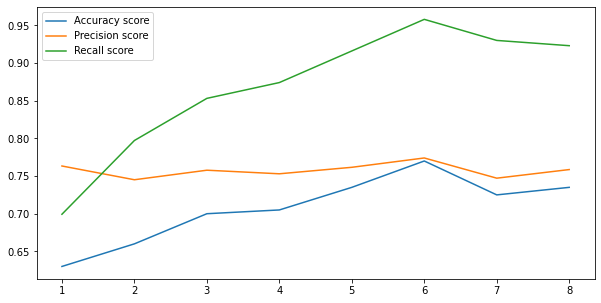

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(numbers, Accuracy, label="Accuracy score")
plt.plot(numbers, Precision, label="Precision score")
plt.plot(numbers, Recall, label="Recall score")
plt.legend(loc="best")

2.5 Используя модель из 2.2, получите прогнозы для всех объектов. Используя метод главных компонент, понизьте размерность данных до 2. Визуализируйте полученные точки на плоскости и раскрасьте их в цвет, соответствующих предсказанному классу.

In [45]:
all_y_pred = rfc.predict(X)
pca_ = PCA(n_components=2)
X_new = pca_.fit_transform(X)

In [46]:
X_new.T

array([[-2102.28631911,  2679.80274564, -1175.27584606, ...,
        -2467.27281549, -1426.19038703,  1304.80073803],
       [   32.86316714,   -17.31385089,    14.42886383, ...,
            3.13290208,   -17.21277939,   -12.28129086]])

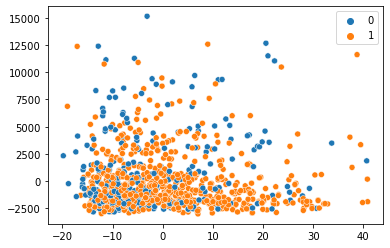

In [47]:
f, ax = plt.subplots()
sns.scatterplot(y=X_new.T[0], x=X_new.T[1], hue=all_y_pred, ax=ax)
plt.show()

2.6 Повторите 2.5, используя алгоритм t-SNE.

In [48]:
from sklearn.manifold import TSNE

t_sne = TSNE(n_components = 2)
X_t_snc = t_sne.fit_transform(X)

In [49]:
X_t_snc

array([[ 10.304967 , -14.141981 ],
       [  8.859848 ,  41.317684 ],
       [-31.500467 , -16.30386  ],
       ...,
       [ 28.36048  , -18.809492 ],
       [-31.772888 ,  -1.8628511],
       [ 20.384285 ,  34.422848 ]], dtype=float32)

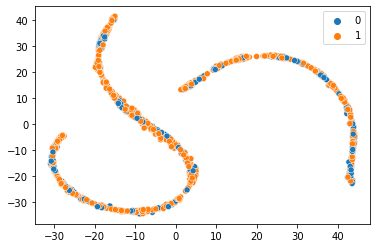

In [50]:
f, ax = plt.subplots()
sns.scatterplot(y=X_t_snc.T[0], x=X_t_snc.T[1], hue=all_y_pred, ax=ax)
plt.show()